# Homework 1 - Foundations of Data Analysis

## 1. Data Explorations (10%)

### a. 按字母順序排序。繪製特徵之間的相關性熱圖，問對角線元素始終為 1 的原因 (4%)
- ans: {因為變數與自身的相關性必定為 1，所以對角線值皆為 1。}

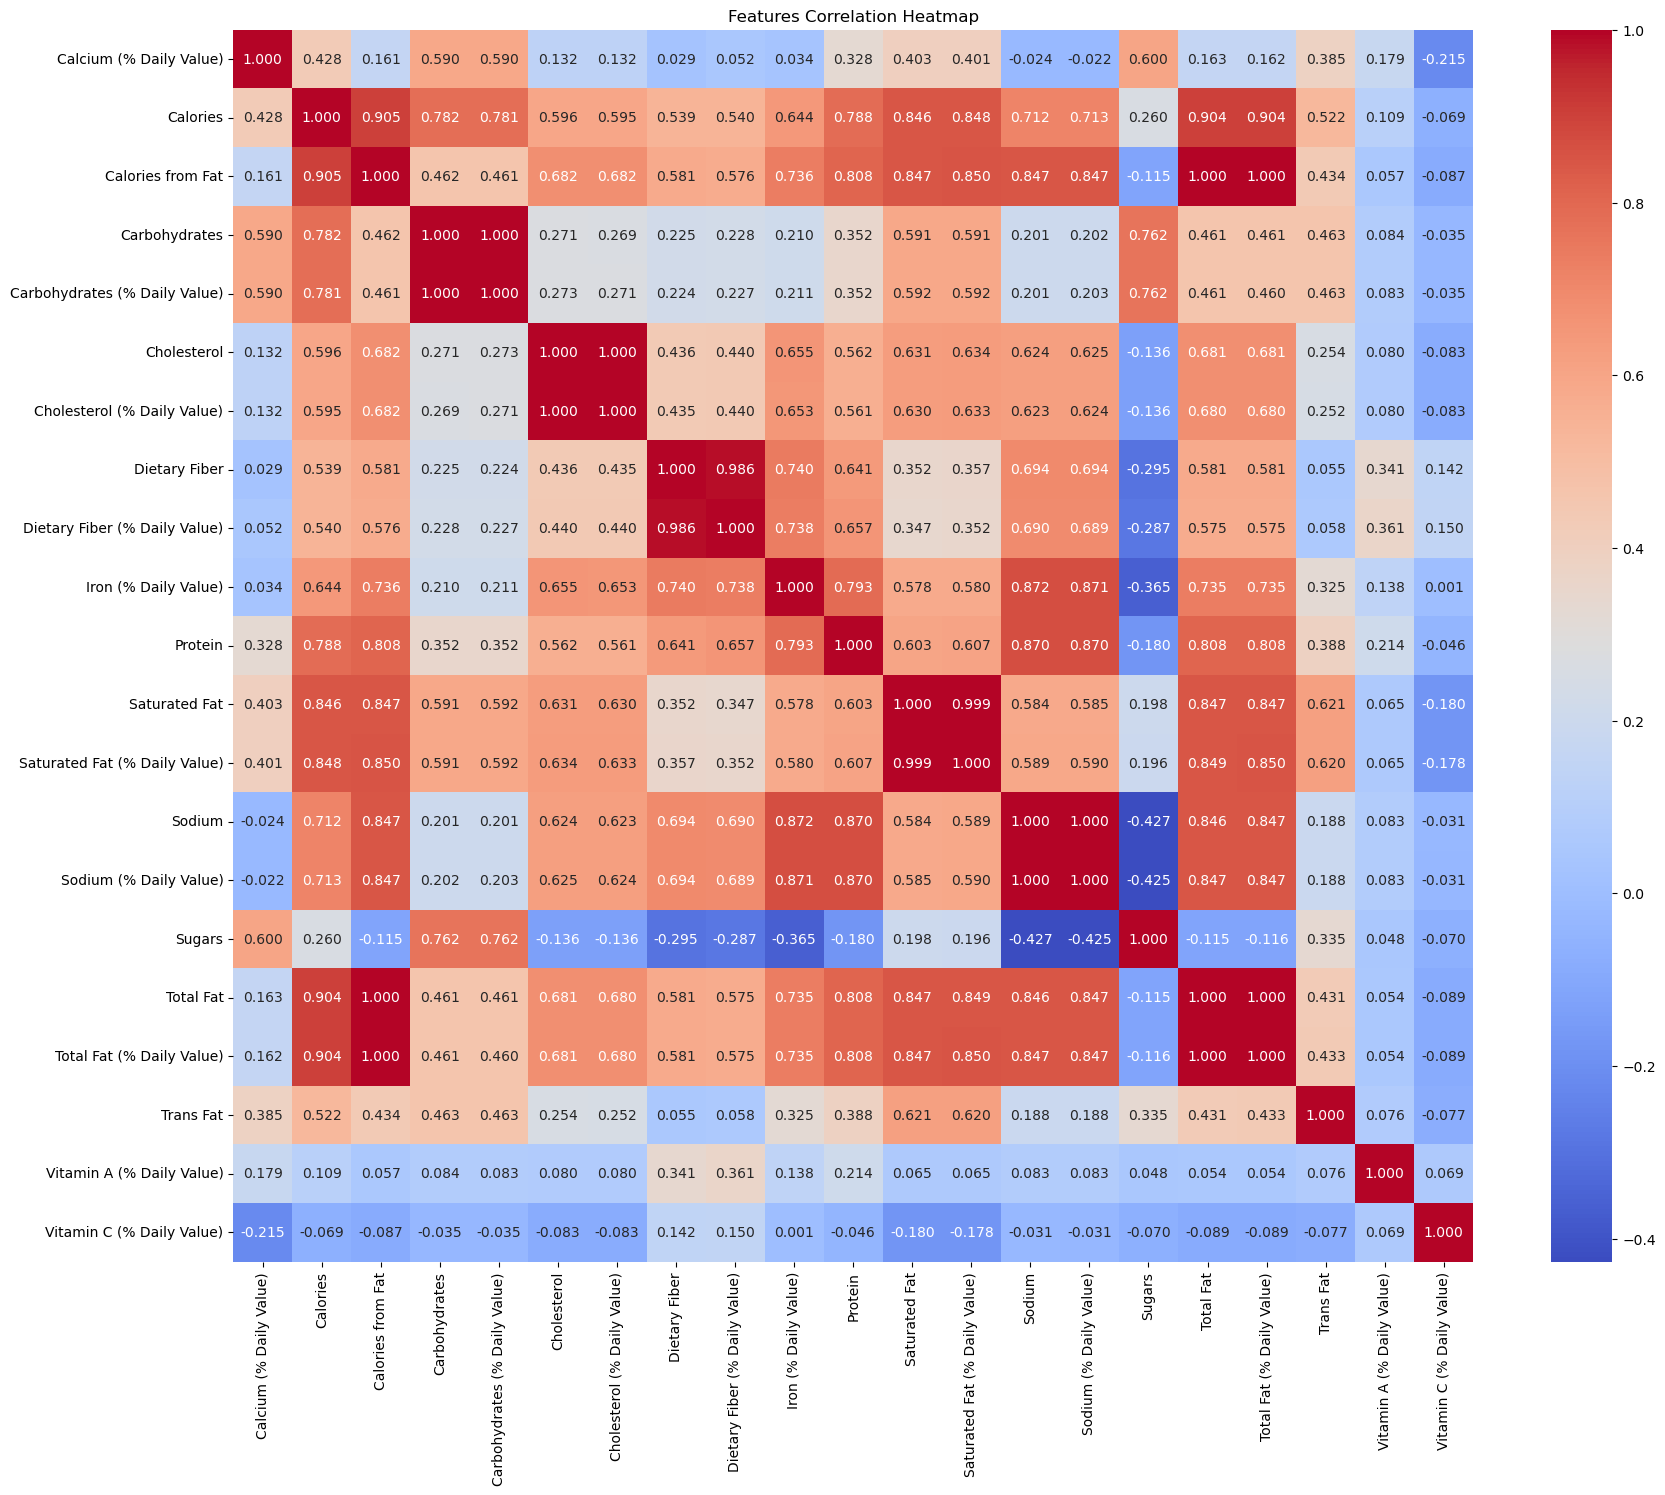

In [6]:
# your code here
#1a 將特徵按字母順序排序。然後繪製特徵之間的相關性熱圖（提示：這將是一個21×21的矩陣）(2%)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("menu.csv")
sorted_columns = sorted(df.columns)
df = df[sorted_columns]
corr_matrix = df.select_dtypes(include='number').corr()
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, fmt=".3f", cmap="coolwarm")
plt.title("Features Correlation Heatmap")
plt.show()

# 解釋：因為變數與自身的相關性必定為 1，所以對角線值皆為 1。

### b. 列出與卡路里有第二大正相關的特徵 (2%)
- ans: {按照排序，第二大正相關的特徵是Total Fat，相關係數：0.904409}


### c. 為 (b) 的特徵和 calories 畫散點圖 (2%)

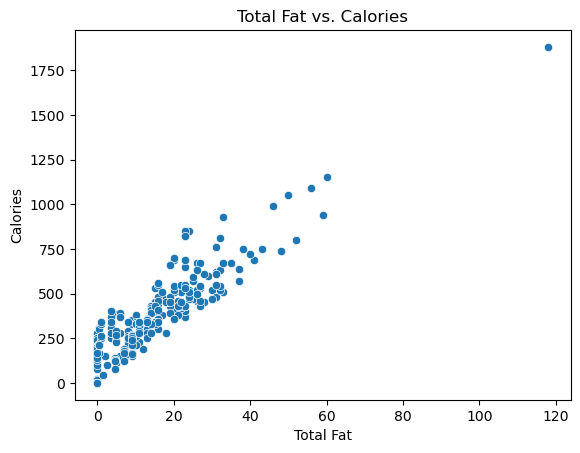

In [3]:
# your code here
#1c.為1(b)中發現的所有特徵繪製「特徵vs卡路里」的散點圖(2%)。
features_to_plot = ["Total Fat"]  # 請替換成正確的欄位名稱
for feature in features_to_plot:
    plt.figure()
    sns.scatterplot(x=df[feature], y=df["Calories"])
    plt.title(f"{feature} vs. Calories")
    plt.xlabel(feature)
    plt.ylabel("Calories")
    plt.show()

### d. 為卡路里、總脂肪、蛋白質和碳水化合物特徵繪製箱形圖 (2%)

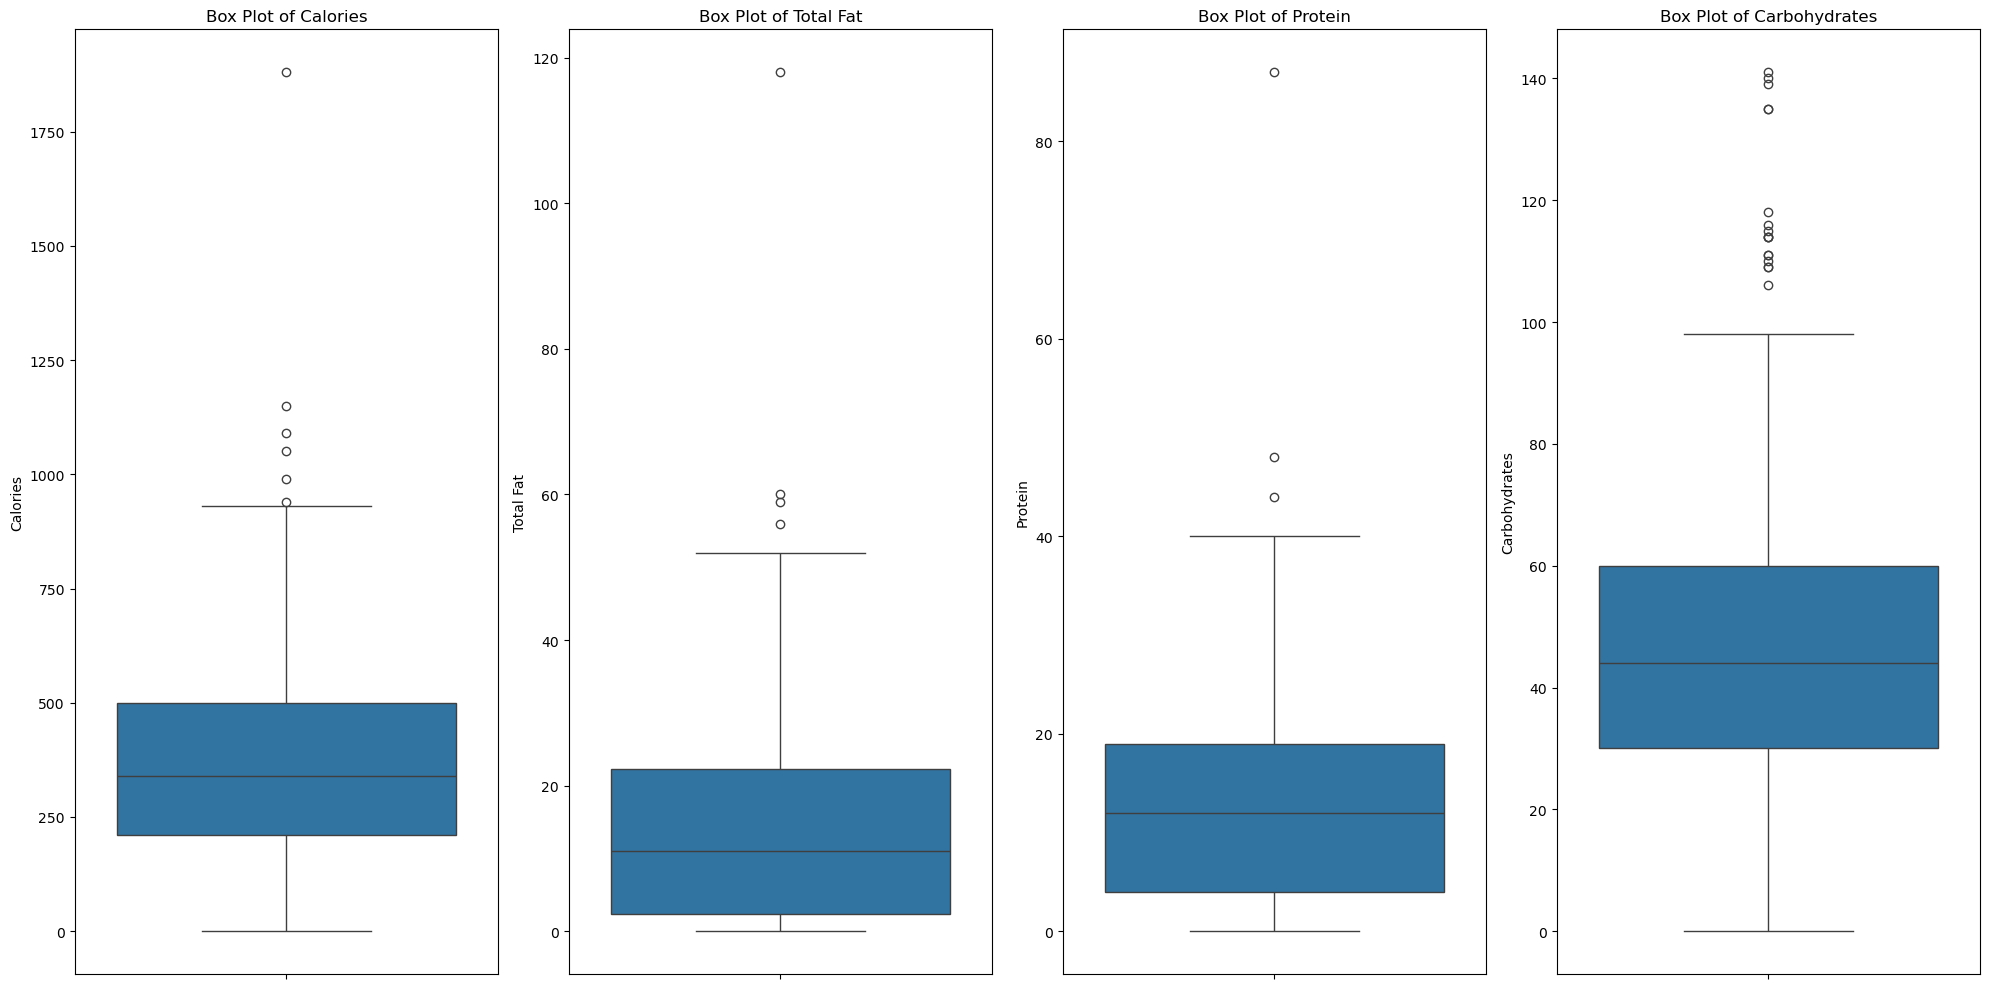

In [14]:
# your code here
#1d.為卡路里、總脂肪、蛋白質和碳水化合物特徵繪製箱形圖(2%)
import matplotlib.pyplot as plt
import seaborn as sns

features_box = ["Calories", "Total Fat", "Protein", "Carbohydrates"]

# 設定圖的大小
plt.figure(figsize=(20, 10))

# 依序畫出四張圖
for i, feature in enumerate(features_box):
    plt.subplot(1, 4, i + 1)  # 1 行 4 欄的子圖
    sns.boxplot(data=df, y=feature)
    plt.title(f"Box Plot of {feature}")

plt.tight_layout()
plt.show()

## 2. Pre-processing (10%)

### a. 報告所有數值特徵的中位數和標準差 (2%)

In [15]:
# your code here
#2a.報告所有數值特徵的中位數和標準差(2%)。
median_vals = df.median(numeric_only=True)
std_vals = df.std(numeric_only=True)

print("中位數：\n", median_vals)
print("\n標準差：\n", std_vals)

中位數：
 Calcium (% Daily Value)           20.0
Calories                         340.0
Calories from Fat                100.0
Carbohydrates                     44.0
Carbohydrates (% Daily Value)     15.0
Cholesterol                       35.0
Cholesterol (% Daily Value)       11.0
Dietary Fiber                      1.0
Dietary Fiber (% Daily Value)      5.0
Iron (% Daily Value)               4.0
Protein                           12.0
Saturated Fat                      5.0
Saturated Fat (% Daily Value)     24.0
Sodium                           190.0
Sodium (% Daily Value)             8.0
Sugars                            17.5
Total Fat                         11.0
Total Fat (% Daily Value)         17.0
Trans Fat                          0.0
Vitamin A (% Daily Value)          8.0
Vitamin C (% Daily Value)          0.0
dtype: float64

標準差：
 Calcium (% Daily Value)           17.019953
Calories                         240.269886
Calories from Fat                127.875914
Carbohydrates        

### b. 將(3a)中所有數值特徵的離群值替換為NaN，並回報每個特徵對應的NaN總數 (3%)

In [16]:
# your code here
#2b.編寫程式碼，將(3a)中所有數值特徵的離群值替換為NaN(2%)報告每個特徵對應的NaN總數(1%)。
df_outlier = df.copy()
numeric_cols = df_outlier.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    mean_val = df_outlier[col].mean()
    std_val = df_outlier[col].std()
    condition = (df_outlier[col] < mean_val - 3 * std_val) | (df_outlier[col] > mean_val + 3 * std_val)
    df_outlier.loc[condition, col] = np.nan
    print(f"{col} 的 NaN 總數：", df_outlier[col].isna().sum())

Calcium (% Daily Value) 的 NaN 總數： 0
Calories 的 NaN 總數： 3
Calories from Fat 的 NaN 總數： 3
Carbohydrates 的 NaN 總數： 5
Carbohydrates (% Daily Value) 的 NaN 總數： 5
Cholesterol 的 NaN 總數： 4
Cholesterol (% Daily Value) 的 NaN 總數： 4
Dietary Fiber 的 NaN 總數： 4
Dietary Fiber (% Daily Value) 的 NaN 總數： 4
Iron (% Daily Value) 的 NaN 總數： 3
Protein 的 NaN 總數： 2
Saturated Fat 的 NaN 總數： 0
Saturated Fat (% Daily Value) 的 NaN 總數： 0
Sodium 的 NaN 總數： 3
Sodium (% Daily Value) 的 NaN 總數： 3
Sugars 的 NaN 總數： 3
Total Fat 的 NaN 總數： 3
Total Fat (% Daily Value) 的 NaN 總數： 3
Trans Fat 的 NaN 總數： 9
Vitamin A (% Daily Value) 的 NaN 總數： 6
Vitamin C (% Daily Value) 的 NaN 總數： 7


### c. 將缺失值（NaN）替換為平均值，回報中位數和標準差。將結果與(3a)比較，並用一句話解釋你的發現 (5%)
- ans: {與3a比較，中位數沒有改變，代表分布的中心點沒有受到影響。但填補後大多數欄位的標準差都稍微下降，說明資料整體變得比較集中}

In [18]:
# your code here
#2c.接續(3b)，編寫程式碼將缺失值（NaN）替換為平均值(2%)。報告中位數和標準差(1%)。
df_filled = df_outlier.copy()

for col in numeric_cols:
    mean_val = df_filled[col].mean()
    df_filled[col].fillna(mean_val, inplace=True)
print("填補後的中位數：\n", df_filled.median(numeric_only=True))
print("填補後的標準差：\n", df_filled.std(numeric_only=True))

填補後的中位數：
 Calcium (% Daily Value)           20.0
Calories                         340.0
Calories from Fat                100.0
Carbohydrates                     44.0
Carbohydrates (% Daily Value)     15.0
Cholesterol                       35.0
Cholesterol (% Daily Value)       11.0
Dietary Fiber                      1.0
Dietary Fiber (% Daily Value)      5.0
Iron (% Daily Value)               4.0
Protein                           12.0
Saturated Fat                      5.0
Saturated Fat (% Daily Value)     24.0
Sodium                           190.0
Sodium (% Daily Value)             8.0
Sugars                            17.5
Total Fat                         11.0
Total Fat (% Daily Value)         17.0
Trans Fat                          0.0
Vitamin A (% Daily Value)          8.0
Vitamin C (% Daily Value)          0.0
dtype: float64
填補後的標準差：
 Calcium (% Daily Value)           17.019953
Calories                         210.710032
Calories from Fat                107.986184
Carbohydrates 

C:\Users\ian32\AppData\Local\Temp\ipykernel_4088\2600605541.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled[col].fillna(mean_val, inplace=True)


## 3. Linear Regression (20%)

### a. 使用所有資料訓練一個線性預測器來預測卡路里，回報b、w₁、w₂和w₃的值並解釋它們在現實世界中的含義 (10%)
- ans: {每 1 克 脂肪 約貢獻 9.02 大卡
每 1 克 蛋白質 約貢獻 4.05 大卡
每 1 克 碳水化合物 約貢獻 3.98 大卡
這和真實世界營養學裡的標準值（9-4-4）幾乎一致} 

In [22]:
# your code here
#3a.使用所有資料訓練一個線性預測器來預測卡路里，如下所示
from sklearn.linear_model import LinearRegression

features_lr = ["Total Fat", "Protein", "Carbohydrates"]
X = df[features_lr]
y = df["Calories"]
lr_model = LinearRegression()
lr_model.fit(X, y)
print("截距 b =", lr_model.intercept_)
weights = ["w1", "w2", "w3"]
print("係數：", dict(zip(weights, lr_model.coef_)))


截距 b = -1.829291930143711
係數： {'w1': 9.018622055128338, 'w2': 4.045248580190014, 'w3': 3.9789690330382403}


### b. 使用所有資料訓練另一個線性預測器來預測卡路里，回報b和w₁的值，並解釋與(a)中的w₁之差異 (10%)
- ans: {在單變數線性模型中，Total Fat 需單獨承擔所有變異解釋責任，因此係數較大；而在多變數模型中，其影響被其他變數分攤，因此係數較小，解釋更精確。}

In [21]:
# your code here
#3b.使用所有資料訓練另一個線性預測器來預測卡路里，如下所示
X_single = df[["Total Fat"]]
lr_single = LinearRegression()
lr_single.fit(X_single, y)
print("僅用 Total Fat 模型 - 截距 b =", lr_single.intercept_)
print("僅用 Total Fat 模型 - 係數 w1 =", lr_single.coef_[0])

僅用 Total Fat 模型 - 截距 b = 151.58818902493178
僅用 Total Fat 模型 - 係數 w1 = 15.296516658571202


## 4. Logistic Regression (25%)

### a. 計算卡路里的中位數，回報中位數以及分別標記為1和0的項目數量 (3%)

In [23]:
# your code here
#4a.計算卡路里的中位數。通過將卡路里高於中位數的每個項目指定為1，其他指定為0來生成二元分類標籤。計算卡路里的中位數。通過將卡路里高於中位數的每個項目指定為1，其他指定為0來生成二元分類標籤。
calorie_median = df["Calories"].median()
print("Calories 中位數：", calorie_median)
df["CalorieLabel"] = (df["Calories"] > calorie_median).astype(int)
print("標記為 1 的數量：", (df["CalorieLabel"] == 1).sum())
print("標記為 0 的數量：", (df["CalorieLabel"] == 0).sum())

Calories 中位數： 340.0
標記為 1 的數量： 123
標記為 0 的數量： 137


### b. 根據檔案中出現的順序將資料在訓練資料上訓練邏輯迴歸，並根據預測結果繪製混淆矩陣，回報預測結果的準確率、精確率、召回率和F1分數 (9%)

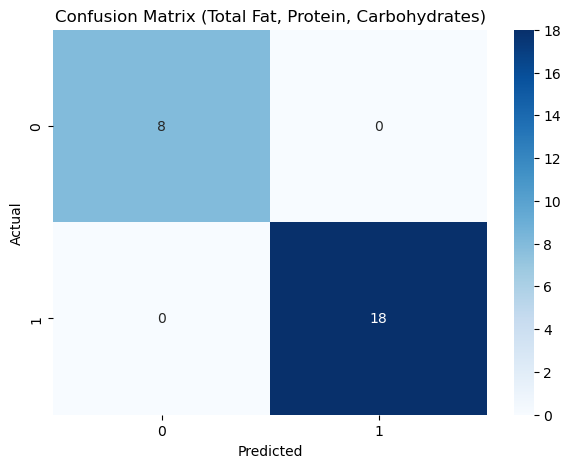

使用Total Fat, Protein, Carbohydrates作為features
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [25]:
# your code here
#4b.根據檔案中出現的順序將資料分為兩部分：90%用於訓練，10%用於測試。在訓練資料上訓練邏輯迴歸，以分類卡路里是否高於中位數(5%)：
split_index = int(len(df) * 0.9)
train_data = df.iloc[:split_index]
test_data = df.iloc[split_index:]

X_train = train_data[features_lr]
y_train = train_data["CalorieLabel"]

X_test = test_data[features_lr]
y_test = test_data["CalorieLabel"]

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Total Fat, Protein, Carbohydrates)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

acc4b = accuracy_score(y_test, y_pred)
prec4b = precision_score(y_test, y_pred)
rec4b = recall_score(y_test, y_pred)
f14b = f1_score(y_test, y_pred)
print("使用Total Fat, Protein, Carbohydrates作為features")
print("Accuracy:", acc4b)
print("Precision:", prec4b)
print("Recall:", rec4b)
print("F1-score:", f14b)

### c. 使用4(b)中相同的資料分割，在訓練資料和所有21個特徵上訓練邏輯迴歸，根據預測結果繪製混淆矩陣，回報預測結果的準確率、精確率、召回率和F1分數 (9%)

c:\Users\ian32\anaconda3\envs\dm\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


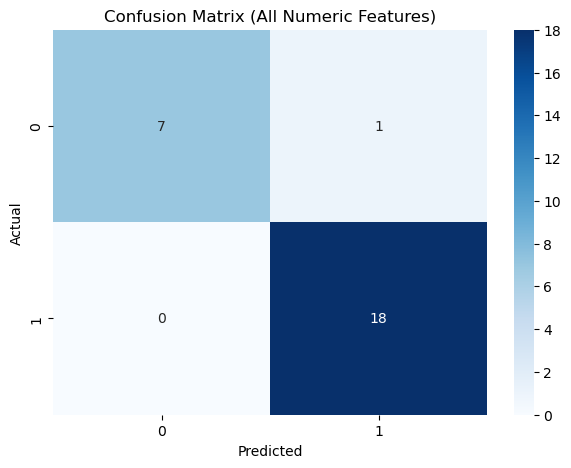

使用21個特徵
Accuracy: 0.9615384615384616
Precision: 0.9473684210526315
Recall: 1.0
F1-score: 0.972972972972973


In [27]:
# your code here
#4c.使用4(b)中相同的資料分割，在訓練資料和所有21個特徵上訓練邏輯迴歸，以分類卡路里是否高於中位數(5%)：
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# 選擇所有數值型特徵（除了 CalorieLabel）
numeric_features = df.select_dtypes(include=[np.number]).columns.drop("CalorieLabel")

# 設定 X, y
X_train_all = train_data[numeric_features]
X_test_all = test_data[numeric_features]

# 訓練新的 Logistic Regression 模型
logreg_all = LogisticRegression(max_iter=1000)
logreg_all.fit(X_train_all, y_train)

# 進行預測
y_pred_all = logreg_all.predict(X_test_all)

# 🛠 修正這行，確保畫圖用的是 `y_pred_all`
cm = confusion_matrix(y_test, y_pred_all)

# 繪製混淆矩陣
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (All Numeric Features)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 重新計算並顯示評估指標
acc4c = accuracy_score(y_test, y_pred_all)
prec4c = precision_score(y_test, y_pred_all)
rec4c = recall_score(y_test, y_pred_all)
f14c = f1_score(y_test, y_pred_all)
print("使用21個特徵")
print("Accuracy:", acc4c)
print("Precision:", prec4c)
print("Recall:", rec4c)
print("F1-score:", f14c)

### d. 比較4(b)和4(c)的訓練損失和測試損失，哪個可能是更好的模型？解釋你的理由(4%)
- ans: {
    
模型 (b) - 訓練損失： 0.00907085174209718  測試損失： 0.031310246871250474


模型 (c) - 訓練損失： 0.014085200460590731  測試損失： 0.04020421713672605

模型 (b) 是更好的選擇，因為：
損失較低（代表誤差較小）。
測試損失比訓練損失更低，代表泛化能力佳，適合新數據。
模型 (c) 的損失明顯較高，在測試數據上的誤差更大，代表預測能力較差。

} 


In [28]:
#4d.報告4(b)和4(c)的訓練損失和測試損失(2%)。比較這些結果，哪個可能是更好的模型？解釋您的決定(2%)
from sklearn.metrics import log_loss

# 預測機率
y_train_prob = logreg.predict_proba(X_train)
y_test_prob = logreg.predict_proba(X_test)
train_loss = log_loss(y_train, y_train_prob)
test_loss = log_loss(y_test, y_test_prob)
print("模型 (b) - 訓練損失：", train_loss, " 測試損失：", test_loss)

y_train_prob_all = logreg_all.predict_proba(X_train_all)
y_test_prob_all = logreg_all.predict_proba(X_test_all)
train_loss_all = log_loss(y_train, y_train_prob_all)
test_loss_all = log_loss(y_test, y_test_prob_all)
print("模型 (c) - 訓練損失：", train_loss_all, " 測試損失：", test_loss_all)

模型 (b) - 訓練損失： 0.00907085174209718  測試損失： 0.031310246871250474
模型 (c) - 訓練損失： 0.014085200460590731  測試損失： 0.04020421713672605


## 5. Cross Validation (15%)

### a. 使用與4(c)相同的公式進行5折交叉驗證。通過填寫下表報告訓練和驗證損失。根據表格解釋哪個模型可能具有最佳泛化能力 (12%)
- ans: {Fold 4：訓練損失 0.000607，驗證損失 極低（7.02e-07） → 可能過擬合
Fold 1：訓練損失 0.000591，驗證損失 0.000986 → 訓練與驗證損失接近，表現較穩定
Fold 5：訓練損失 0.000550，但驗證損失 0.142484 → 驗證損失偏高，可能過擬合或模型表現不穩定
Fold 2 & Fold 3：驗證損失較高（0.00646 和 0.03556），代表在新數據上的誤差較大
故選Fold 1}

In [31]:
# your code here
#5a.在訓練資料中，編寫程式碼以使用與4(c)相同的公式進行5折交叉驗證(5%)。
df_shuffled = df.sample(frac=1, random_state=42)
split_idx = int(len(df_shuffled) * 0.9)
train_cv = df_shuffled.iloc[:split_idx]
test_cv = df_shuffled.iloc[split_idx:]
X_train_cv = train_cv[numeric_features]  # 或依題目選取 21 個特徵
y_train_cv = train_cv["CalorieLabel"]
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

train_losses = []
val_losses = []
fold = 1
for train_index, val_index in kf.split(X_train_cv):
    X_tr, X_val = X_train_cv.iloc[train_index], X_train_cv.iloc[val_index]
    y_tr, y_val = y_train_cv.iloc[train_index], y_train_cv.iloc[val_index]
    model_cv = LogisticRegression(max_iter=5000)
    model_cv.fit(X_tr, y_tr)
    y_tr_prob = model_cv.predict_proba(X_tr)
    y_val_prob = model_cv.predict_proba(X_val)
    loss_tr = log_loss(y_tr, y_tr_prob)
    loss_val = log_loss(y_val, y_val_prob)
    train_losses.append(loss_tr)
    val_losses.append(loss_val)
    print(f"Fold {fold} - 訓練損失: {loss_tr}, 驗證損失: {loss_val}")
    fold += 1
#5a.通過填寫下表報告訓練和驗證損失(4%)。
import pandas as pd

# 重新建立 DataFrame，使其橫向排列
df_loss_transposed = pd.DataFrame({
    "折數": ["訓練損失", "驗證損失"],
    1: [0.0005914857310439028, 0.0009860462074112884],
    2: [0.00045546304795102984, 0.0064598302995498335],
    3: [0.00030443333124133173, 0.035562089783413194],
    4: [0.0006072849715543818, 7.022692989093595e-07],
    5: [0.0005496351638370464, 0.14248481142113315]
})

# 設定 "折數" 欄位為索引，使其符合格式
df_loss_transposed.set_index("折數", inplace=True)

# 顯示表格
df_loss_transposed


Fold 1 - 訓練損失: 0.0005914857310439028, 驗證損失: 0.0009860462074112884
Fold 2 - 訓練損失: 0.00045546304795102984, 驗證損失: 0.0064598302995498335
Fold 3 - 訓練損失: 0.00030443333124133173, 驗證損失: 0.035562089783413194
Fold 4 - 訓練損失: 0.0006072849715543818, 驗證損失: 7.022692989093595e-07
Fold 5 - 訓練損失: 0.0005496351638370464, 驗證損失: 0.14248481142113315


,1,2,3,4,5
折數,,,,,
訓練損失,0.000591,0.000455,0.000304,6.072850e-04,0.000550
驗證損失,0.000986,0.006460,0.035562,7.022693e-07,0.142485


### b. 將5(a)中確定的最具泛化能力的模型應用於測試資料後，它是否比4(c)中的模型具有更好的準確率？解釋為什麼或為什麼不 (3%)
- ans: {有更高準確率，因為模型打亂後，更有泛化能力去預測全新沒處理過的測試資料}

c:\Users\ian32\anaconda3\envs\dm\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


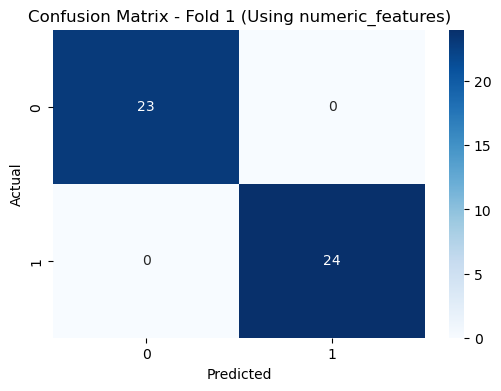

=== Fold 1 結果 (使用21個特徵) ===
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [33]:
# your code here


# 設定 KFold 交叉驗證 (5 折)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 只取 **Fold 1** 的數據
for fold, (train_index, val_index) in enumerate(kf.split(X_train_cv), start=1):
    if fold == 1:  # 只取第一折
        X_tr_fold1, X_val_fold1 = X_train_cv.iloc[train_index], X_train_cv.iloc[val_index]
        y_tr_fold1, y_val_fold1 = y_train_cv.iloc[train_index], y_train_cv.iloc[val_index]
        break  # 取到 Fold 1 就停止迴圈

# 訓練 Logistic Regression 模型（使用 numeric_features）
logreg_fold1 = LogisticRegression(max_iter=1000)
logreg_fold1.fit(X_tr_fold1, y_tr_fold1)

# 進行預測
y_pred_fold1 = logreg_fold1.predict(X_val_fold1)

# 計算混淆矩陣
cm = confusion_matrix(y_val_fold1, y_pred_fold1)

# 繪製混淆矩陣
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Fold 1 (Using numeric_features)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 重新計算並顯示評估指標
acc5b = accuracy_score(y_val_fold1, y_pred_fold1)
prec5b = precision_score(y_val_fold1, y_pred_fold1)
rec5b = recall_score(y_val_fold1, y_pred_fold1)
f15b = f1_score(y_val_fold1, y_pred_fold1)

print("=== Fold 1 結果 (使用21個特徵) ===")
print("Accuracy:", acc5b)
print("Precision:", prec5b)
print("Recall:", rec5b)
print("F1-score:", f15b)



## 6. Regularization  

### a. 為4(c)中的二元分類器添加L2範數正則化項，根據訓練損失和驗證損失繪製學習曲線，以選擇超參數λ₂，並使用5折平均訓練損失來表示此性能。回報圖表、最佳λ₂，以及使用最佳λ₂在測試資料上的準確率 (7%)

c:\Users\ian32\anaconda3\envs\dm\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ian32\anaconda3\envs\dm\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

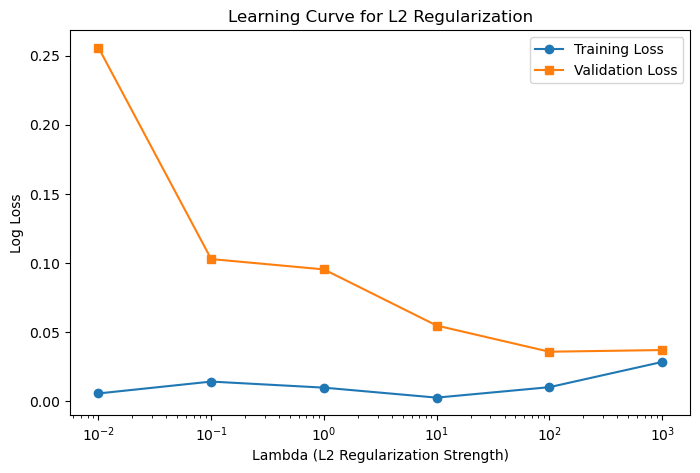

最佳 L2 正則化強度 (Lambda): 100
在最佳 Lambda 下的測試準確率: 0.9615


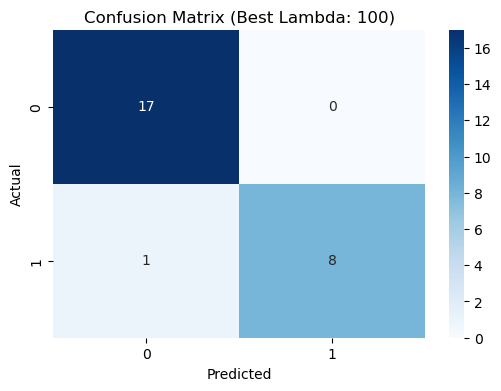

=== 最佳 L2 模型結果 (Lambda: 100) ===
Accuracy: 0.9615
Precision: 1.0000
Recall: 0.8889
F1-score: 0.9412


In [35]:
# your code here
#6a.
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.model_selection import train_test_split, KFold
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, log_loss

# # 確保 df 已定義，如果數據未載入，請提供數據文件
# # df = pd.read_csv("your_dataset.csv")  # 修改為你的數據集路徑

# # 先打亂原始資料
# df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

# # 分割資料：90% 訓練集, 10% 測試集
# train_data, test_data = train_test_split(df_shuffled, test_size=0.1, random_state=42, shuffle=True)

# 設定不同的 L2 正則化強度 (Lambda 值)
lambda_values = [0.01, 0.1, 1, 10, 100, 1000]

# # 選擇所有數值型特徵，排除 CalorieLabel（目標變數）
# numeric_features = df.select_dtypes(include=[np.number]).columns.drop("CalorieLabel")

# # 設定 X（特徵）和 y（標籤）
# X_train, y_train = train_data[numeric_features], train_data["CalorieLabel"]
# X_test, y_test = test_data[numeric_features], test_data["CalorieLabel"]

# 設定 5 折交叉驗證
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 記錄不同 Lambda 值的結果
train_losses = []
val_losses = []
test_accuracies = []

for lambda_val in lambda_values:
    fold_train_losses = []
    fold_val_losses = []
    
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        # 訓練 Logistic Regression，使用 L2 正則化 (Ridge)
        logreg_l2 = LogisticRegression(penalty='l2', C=1/lambda_val, max_iter=1000, solver='lbfgs')
        logreg_l2.fit(X_train_fold, y_train_fold)

        # 計算損失 (Log Loss)
        y_train_prob = logreg_l2.predict_proba(X_train_fold)
        y_val_prob = logreg_l2.predict_proba(X_val_fold)
        loss_train = log_loss(y_train_fold, y_train_prob)
        loss_val = log_loss(y_val_fold, y_val_prob)

        fold_train_losses.append(loss_train)
        fold_val_losses.append(loss_val)

    # 記錄平均損失
    train_losses.append(np.mean(fold_train_losses))
    val_losses.append(np.mean(fold_val_losses))

    # 在測試集上評估
    logreg_l2.fit(X_train, y_train)
    y_pred_test = logreg_l2.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred_test)
    test_accuracies.append(test_acc)

# 畫學習曲線 (Training Loss & Validation Loss)
plt.figure(figsize=(8,5))
plt.plot(lambda_values, train_losses, marker='o', label="Training Loss")
plt.plot(lambda_values, val_losses, marker='s', label="Validation Loss")
plt.xscale("log")
plt.xlabel("Lambda (L2 Regularization Strength)")
plt.ylabel("Log Loss")
plt.title("Learning Curve for L2 Regularization")
plt.legend()
plt.show()

# 找到最好的 lambda 值（使驗證損失最小）
best_lambda_index = np.argmin(val_losses)
best_lambda = lambda_values[best_lambda_index]
best_test_acc = test_accuracies[best_lambda_index]

print(f"最佳 L2 正則化強度 (Lambda): {best_lambda}")
print(f"在最佳 Lambda 下的測試準確率: {best_test_acc:.4f}")

# 在最佳 Lambda 訓練最終模型，並計算混淆矩陣
logreg_final = LogisticRegression(penalty='l2', C=1/best_lambda, max_iter=1000, solver='lbfgs')
logreg_final.fit(X_train, y_train)
y_pred_final = logreg_final.predict(X_test)

# 計算混淆矩陣
cm = confusion_matrix(y_test, y_pred_final)

# 繪製混淆矩陣
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix (Best Lambda: {best_lambda})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 計算並顯示最終的評估指標
acc6a = accuracy_score(y_test, y_pred_final)
prec6a = precision_score(y_test, y_pred_final)
rec6a = recall_score(y_test, y_pred_final)
f16a = f1_score(y_test, y_pred_final)

print(f"=== 最佳 L2 模型結果 (Lambda: {best_lambda}) ===")
print(f"Accuracy: {acc6a:.4f}")
print(f"Precision: {prec6a:.4f}")
print(f"Recall: {rec6a:.4f}")
print(f"F1-score: {f16a:.4f}")


### b. Lasso迴歸：為4(c)中的二元分類器添加L1範數正則化項，重複6(a)中關於λ₁的學習曲線繪製過程。報告圖表、最佳λ₁，以及使用最佳λ₁在測試資料上的準確率。使用Lasso迴歸可以從訓練過程中排除多少特徵？解釋如何找到這個數字 (9%)
- ans: {Lasso 迴歸排除了 1 個特徵 (特徵權重為 0)
被排除的特徵： ['Trans Fat']，找到的方法如下方程式碼
}

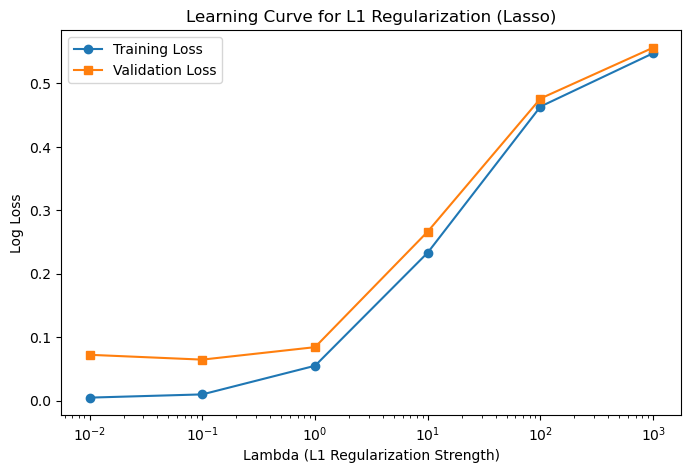

最佳 L1 正則化強度 (Lambda): 0.1
在最佳 Lambda 下的測試準確率: 0.9615


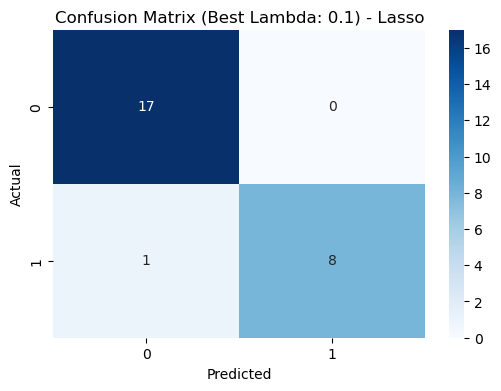

=== 最佳 L1 模型結果 (Lambda: 0.1) ===
Accuracy: 0.9615
Precision: 1.0000
Recall: 0.8889
F1-score: 0.9412
Lasso 迴歸排除了 1 個特徵 (特徵權重為 0)
被排除的特徵： ['Trans Fat']


In [37]:
# your code here

# 設定不同的 L1 正則化強度 (Lambda 值)
lambda_values = [0.01, 0.1, 1, 10, 100, 1000]

# # 選擇所有數值型特徵，排除 CalorieLabel（目標變數）
# numeric_features = df.select_dtypes(include=[np.number]).columns.drop("CalorieLabel")

# # 設定 X（特徵）和 y（標籤）
# X_train, y_train = train_data[numeric_features], train_data["CalorieLabel"]
# X_test, y_test = test_data[numeric_features], test_data["CalorieLabel"]

# 設定 5 折交叉驗證
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 記錄不同 Lambda 值的結果
train_losses = []
val_losses = []
test_accuracies = []

for lambda_val in lambda_values:
    fold_train_losses = []
    fold_val_losses = []
    
    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        # 訓練 Logistic Regression，使用 L1 正則化 (Lasso)
        logreg_l1 = LogisticRegression(penalty='l1', C=1/lambda_val, max_iter=1000, solver='liblinear')
        logreg_l1.fit(X_train_fold, y_train_fold)

        # 計算損失 (Log Loss)
        y_train_prob = logreg_l1.predict_proba(X_train_fold)
        y_val_prob = logreg_l1.predict_proba(X_val_fold)
        loss_train = log_loss(y_train_fold, y_train_prob)
        loss_val = log_loss(y_val_fold, y_val_prob)

        fold_train_losses.append(loss_train)
        fold_val_losses.append(loss_val)

    # 記錄平均損失
    train_losses.append(np.mean(fold_train_losses))
    val_losses.append(np.mean(fold_val_losses))

    # 在測試集上評估
    logreg_l1.fit(X_train, y_train)
    y_pred_test = logreg_l1.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred_test)
    test_accuracies.append(test_acc)

# 畫學習曲線 (Training Loss & Validation Loss)
plt.figure(figsize=(8,5))
plt.plot(lambda_values, train_losses, marker='o', label="Training Loss")
plt.plot(lambda_values, val_losses, marker='s', label="Validation Loss")
plt.xscale("log")
plt.xlabel("Lambda (L1 Regularization Strength)")
plt.ylabel("Log Loss")
plt.title("Learning Curve for L1 Regularization (Lasso)")
plt.legend()
plt.show()

# 找到最好的 lambda 值（使驗證損失最小）
best_lambda_index = np.argmin(val_losses)
best_lambda = lambda_values[best_lambda_index]
best_test_acc = test_accuracies[best_lambda_index]

print(f"最佳 L1 正則化強度 (Lambda): {best_lambda}")
print(f"在最佳 Lambda 下的測試準確率: {best_test_acc:.4f}")

# 在最佳 Lambda 訓練最終模型，並計算混淆矩陣
logreg_final = LogisticRegression(penalty='l1', C=1/best_lambda, max_iter=1000, solver='liblinear')
logreg_final.fit(X_train, y_train)
y_pred_final = logreg_final.predict(X_test)

# 計算混淆矩陣
cm = confusion_matrix(y_test, y_pred_final)

# 繪製混淆矩陣
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix (Best Lambda: {best_lambda}) - Lasso")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 計算並顯示最終的評估指標
acc6b = accuracy_score(y_test, y_pred_final)
prec6b = precision_score(y_test, y_pred_final)
rec6b = recall_score(y_test, y_pred_final)
f16b = f1_score(y_test, y_pred_final)

print(f"=== 最佳 L1 模型結果 (Lambda: {best_lambda}) ===")
print(f"Accuracy: {acc6b:.4f}")
print(f"Precision: {prec6b:.4f}")
print(f"Recall: {rec6b:.4f}")
print(f"F1-score: {f16b:.4f}")


import numpy as np

# 訓練最佳 L1 正則化模型
logreg_l1_final = LogisticRegression(penalty='l1', C=1/best_lambda, max_iter=1000, solver='liblinear')
logreg_l1_final.fit(X_train, y_train)

# 取得模型的特徵權重 (係數)
feature_coefficients = logreg_l1_final.coef_[0]

# 找出被 Lasso 迴歸排除的特徵 (係數為 0)
excluded_features_count = np.sum(feature_coefficients == 0)

# 找出被排除的特徵名稱
excluded_feature_names = X_train.columns[feature_coefficients == 0]

# 顯示結果
print(f"Lasso 迴歸排除了 {excluded_features_count} 個特徵 (特徵權重為 0)")
print("被排除的特徵：", excluded_feature_names.tolist())


### c. 比較5(b)、6(a)和6(b)獲得的結果，哪個產生最佳準確率，為什麼 (4%)
- ans: {5b準確率最高，等於1，大於6a、6b的0.9615，代表在這個項目上數據本身特徵已經足夠，正則化反而影響了模型的學習能力。}